# Ejemplo de proyecto de Aprendizaje Automático Supervisado

En este ejemplo vamos a usar un dataset que es muy común y que se llama "digits" (puedes encontrar información sobre el dataset [aquí](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)).

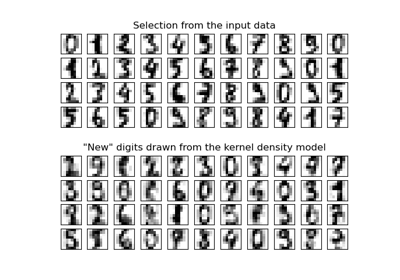

Aunque un proyecto de Machine Learning no tiene por qué ser lineal, si que hay algunos puntos que hay que tener en cuenta siempre:


1.   Definir el problema
2.   Preparar los datos
3.   Evaluar los algoritmos
4.   Mejorar los resultados
5.   Presentar los resultados


## 1. Definir el problema

Se busca **clasificar** las imágenes en {0,1,2,3,4,5,6,7,8,9}. Las imágenes tienen un tamaño de 8x8 píxels y las características son el valor de cada uno de los píxeles (toman valor entre 0 y 16).

Por ejemplo, el primer dato es un 0,

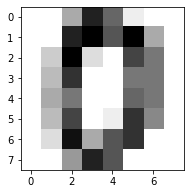

y viene representado así:


      ([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])


en lugar de verlo como una matriz lo vamos a ver en una fila, a la que llamaremos instancia:

	0.0	0.0	5.0	13.0	9.0	1.0	0.0	0.0	0.0	0.0	13.0	15.0	10.0	15.0	5.0	0.0	0.0	3.0	15.0	2.0	0.0	11.0	8.0	0.0	0.0	4.0	12.0	0.0	0.0	8.0	8.0	0.0	0.0	5.0	8.0	0.0	0.0	9.0	8.0	0.0	0.0	4.0	11.0	0.0	1.0	12.0	7.0	0.0	0.0	2.0	14.0	5.0	10.0	12.0	0.0	0.0	0.0	0.0	6.0	13.0	10.0	0.0	0.0	0.0

## 2. Preparar los datos

La preparación de datos se ve con más detenimiento en otra asignatura del máster en esta nos vamos a encargar, de explicar la parte de preparación de datos que es más directa a los algoritmos.

### 2.1 Importar librerías

In [ ]:
# importar los módulos, funciones y objetos que vamos a usar
import pandas as pd
import numpy as np
from pandas import read_csv # cargar un archivo csv

### 2.2. Cargar los datos

Una fuente de datos que se suele utilizar es el repositorio de ["UCI Machine Learning"](https://archive.ics.uci.edu/ml/index.php), en esta web opodemos encontrar muchos datasets en particular el que vamos a usar. Sin embargo, el conjunto de datos *digits* también se encuentra en el paquete *datasets* de la librerá *scikit-learn*.

In [ ]:
from sklearn import datasets # para cargar uno de los datasets predefinidos

digits = datasets.load_digits() #The Digit Dataset

Si queremos trabajar con un conjunto de datos que se encuentra en una url, el código para poder cargarlo sería el siguiente:

```
# Cargar el conjunto de datos
url = "" #url dónde se encuentra el dataset
names = ['', '', '', '', ''] #nombres de las columnas
dataset = read_csv(url, names=names)
```

### 2.3. Mostrar un resumen de los datos


Antes de empezar a trabajar con los datos es importante saber como son y como se encuentran dentro del dataset. 

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

Podemos ver que los datos están agrupados en arrays, los que necesitamos son aquellos que contienen las características (*images*), y la variable objetivo(*data*).

In [ ]:
X_array = digits.data #características
y_array = digits.target #varaible objetivo

Para poder trabajar mejor con los datos, vamos a trabajar con DataFrame (pandas) en lugar de con array (numpy) ya que nos va a facilitar el poder echar un primer vistazo a los datos.

In [ ]:
Xdf = pd.DataFrame(X_array)
ydf = pd.DataFrame(y_array, columns=["class"]) #añadiendo el nombre a la columna

In [ ]:
# Para ver el tamaño del conjunto de características y la varibale objetivo
print(Xdf.shape)
print(ydf.shape)

(1797, 64)
(1797, 1)


In [ ]:
# Para ver las 20 primeras instancias del conjunto de datos
print(Xdf.head(20))

     0    1     2     3     4     5   ...    58    59    60    61    62   63
0   0.0  0.0   5.0  13.0   9.0   1.0  ...   6.0  13.0  10.0   0.0   0.0  0.0
1   0.0  0.0   0.0  12.0  13.0   5.0  ...   0.0  11.0  16.0  10.0   0.0  0.0
2   0.0  0.0   0.0   4.0  15.0  12.0  ...   0.0   3.0  11.0  16.0   9.0  0.0
3   0.0  0.0   7.0  15.0  13.0   1.0  ...   7.0  13.0  13.0   9.0   0.0  0.0
4   0.0  0.0   0.0   1.0  11.0   0.0  ...   0.0   2.0  16.0   4.0   0.0  0.0
5   0.0  0.0  12.0  10.0   0.0   0.0  ...   9.0  16.0  16.0  10.0   0.0  0.0
6   0.0  0.0   0.0  12.0  13.0   0.0  ...   1.0   9.0  15.0  11.0   3.0  0.0
7   0.0  0.0   7.0   8.0  13.0  16.0  ...  13.0   5.0   0.0   0.0   0.0  0.0
8   0.0  0.0   9.0  14.0   8.0   1.0  ...  11.0  16.0  15.0  11.0   1.0  0.0
9   0.0  0.0  11.0  12.0   0.0   0.0  ...   9.0  12.0  13.0   3.0   0.0  0.0
10  0.0  0.0   1.0   9.0  15.0  11.0  ...   1.0  10.0  13.0   3.0   0.0  0.0
11  0.0  0.0   0.0   0.0  14.0  13.0  ...   0.0   1.0  13.0  16.0   1.0  0.0

In [ ]:
# Obtener un resumen estadístico de los datos
print(Xdf.describe())

           0            1            2   ...           61           62           63
count  1797.0  1797.000000  1797.000000  ...  1797.000000  1797.000000  1797.000000
mean      0.0     0.303840     5.204786  ...     6.764051     2.067891     0.364496
std       0.0     0.907192     4.754826  ...     5.900623     4.090548     1.860122
min       0.0     0.000000     0.000000  ...     0.000000     0.000000     0.000000
25%       0.0     0.000000     1.000000  ...     0.000000     0.000000     0.000000
50%       0.0     0.000000     4.000000  ...     6.000000     0.000000     0.000000
75%       0.0     0.000000     9.000000  ...    12.000000     2.000000     0.000000
max       0.0     8.000000    16.000000  ...    16.000000    16.000000    16.000000

[8 rows x 64 columns]


In [ ]:
# Conocer la distribución de las clases
print(ydf.groupby('class').size())

class
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64


Acabamos de ver el número de instancias que tiene cada clase, y más o menos tienen un número parecido, es decir, todas las clases están, de manera parecida, representadas en el conjunto de datos.

PREGUNTA: 
- ¿crees que es importante el equilibrio en el número de datos de cada clase?
- en caso de que una clase tenga muchos datos menos, por ejemplo la clase '3' tuviera sólo 2 instancias, ¿qué harías con esta clase o el conjunto de datos en general?


## 3. Evaluar los algoritmos

Este punto se puede dividir en estos pasos:


1.   Separar los conjuntos de entrenamiento, validación y test
2.   Construir el modelo
3.   Calcular métricas

### 3.1. Crear conjuntos de entrenamiento, validación y test

In [ ]:
# para separar los datos
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos conjunto de entrenamiento (90%) y de test (10%)
X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, test_size=0.10, random_state=1)

# Del conjunto de entrenamiento inicial, volvemos a separar en el conjunto de entrenamiento definitivo (80%) y de validación (20%)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

# De esta manera se obtiene el 72% de los datos para entrenar (1293 instancias), el 18% de datos para validar (324 instancias), y el 10% de los datos para testear (180 instancias).

PREGUNTA: 
-  ¿crees que una partición de 34%- 33%- 33% (entrenamiento-validación-testeo) sería óptima?

### 3.2. Construir el modelo

In [ ]:
# algoritmo de clasificación
from sklearn.neighbors import KNeighborsClassifier

El primer modelo que vamos a construir es el kNN (k-Nearest Neighbors), aunque hablaremos de él en el Tema 4 puedes encontrar más información [aquí](https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos).


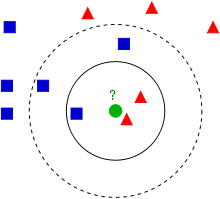

PREGUNTA: 
- con la explicación dada en clase, ¿crees que es buena idea dar un valor par de k?
- ¿crees que un valor alto de k es más restrictivo que un valor bajo?

Para el ejemplo que estamos trabajando vamos a empezar construyendo un modelo cuyo valor de k sea 7.

In [ ]:
model_knn_7 = KNeighborsClassifier(n_neighbors=7) #define el modelo y los hiperparámetros
model_knn_7.fit(X_train, np.ravel(y_train)) #crea el modelo #np.ravel() da una vista "aplanada"

KNeighborsClassifier(n_neighbors=7)

Obtenemos las predicciones para el conjunto de validación a partir del modelo construido.

In [ ]:
y_pred = model_knn_7.predict(X_validation)

### 3.3. Calcular las métricas

PREGUNTA: 
- ¿Cómo a partir de los valores predichos del conjunto de validación, puedo evaluar si el modelo es bueno o no?

In [ ]:
# para la evaluación de los modelos
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

La **accuracy** es una de las métricas más utilizadas, cuánto más cercano a 1 sea su valor mejor es el modelo.

In [ ]:
# calcular accuracy
acc = accuracy_score(y_validation, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.991


Las diferentes métricas se pueden calcular de manera independiente o usando la siguiente instrucción, que nos permite ver que ocurre en cada clase a modo de informe.

In [ ]:
target_names = ['0', '1', '2', '3','4','5', '6', '7', '8','9']
print(classification_report(y_validation, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        33
           8       1.00      0.92      0.96        37
           9       1.00      1.00      1.00        34

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



## 4. Mejorar los resultados



¿Se podrían cambiar los parámetros para obtener un mejor resultado?
Por ejemplo, ¿que ocurre si cambiamos el número de vecinos a 3 y a 15?

In [ ]:
model_knn_3 = KNeighborsClassifier(n_neighbors=3) #define el modelo y los hiperparámetros
model_knn_3.fit(X_train,np.ravel(y_train)) #crea el modelo
y_pred = model_knn_3.predict(X_validation)
# calcular accuracy
acc = accuracy_score(y_validation, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


In [ ]:
model_knn_15 = KNeighborsClassifier(n_neighbors=15) #define el modelo y los hiperparámetros
model_knn_15.fit(X_train,np.ravel(y_train)) #crea el modelo
y_pred = model_knn_15.predict(X_validation)
# calcular accuracy
acc = accuracy_score(y_validation, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.988


## 5. Presentar los resultados

De los modelos construidos nos quedamos con aquel que en validación se obtenga mejor resultado. Con ese modelo se hará el testeo y tendremos el resultado final.

In [ ]:
y_pred_test = model_knn_3.predict(X_test)
# calcular accuracy
acc = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % acc)

Accuracy: 0.994


In [ ]:
# otra manera de calcular directamente la accuracy del modelo es la siguiente
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model_knn_3.score(X_test, y_test)))

Accuracy of K-NN classifier on test set: 0.99


Para ver los aciertos y fallos de cada una de las clases se usa la "matriz de confusión". Hay varias formas de mostrarla, vamos a ver una que es muy clara.

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  1]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


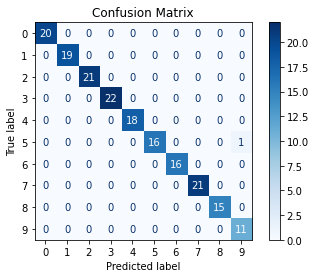

In [ ]:
title="Confusion Matrix"
disp = plot_confusion_matrix(model_knn_3, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(disp.confusion_matrix)